In [10]:
from glob import glob

import skimage
import matplotlib.pyplot as plt

from HAPPY import cropping_functions
from HAPPY import import_image
from HAPPY import plot_functions as plt_f

In [6]:
image_dict5 = dict([(i,j) for i,j in enumerate(sorted(glob('data/Micrographs_Used_To_Test_Code/*'))[::-1])])
image_dict5

{0: 'data/Micrographs_Used_To_Test_Code/520-7b.png',
 1: 'data/Micrographs_Used_To_Test_Code/520-6m.png',
 2: 'data/Micrographs_Used_To_Test_Code/520-6h.png',
 3: 'data/Micrographs_Used_To_Test_Code/520-5m.png',
 4: 'data/Micrographs_Used_To_Test_Code/520-5b.png',
 5: 'data/Micrographs_Used_To_Test_Code/1810A(16).bmp',
 6: 'data/Micrographs_Used_To_Test_Code/1807A(428).bmp',
 7: 'data/Micrographs_Used_To_Test_Code/1806A(293).bmp',
 8: 'data/Micrographs_Used_To_Test_Code/1805A.bmp',
 9: 'data/Micrographs_Used_To_Test_Code/1805A(238).bmp',
 10: 'data/Micrographs_Used_To_Test_Code/1805A(236).bmp'}

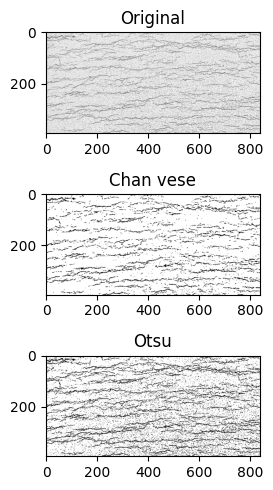

In [33]:
image = import_image.image(image_dict5[0])
cropped_image = cropping_functions.cropImage(image,crop_bottom=150,crop_top=200,crop_left=0,crop_right=150)
cv = skimage.segmentation.chan_vese(cropped_image,mu=0.05)

otsu_thres = skimage.filters.threshold_otsu(cropped_image)
otsu_image = cropped_image > otsu_thres

fig, axes = plt.subplots(3, 1, figsize=(10, 5))  # 3 rows, 1 column, adjust figsize as needed

# Display each image in a subplot
axes[0].imshow(cropped_image, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(cv, cmap='gray')
axes[1].set_title("Chan vese")

axes[2].imshow(otsu_image, cmap='gray')
axes[2].set_title("Otsu")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

* Chan-vese is an image segmentation algorithm which penalised 3 things
1. Surface area
2. Loop length
3. Difference between piecewise constant model and input image

Chan vese does really well when less pixels are present, experiment with optimal number of pixels

[https://www.ipol.im/pub/art/2012/g-cv/article_lr.pdf]

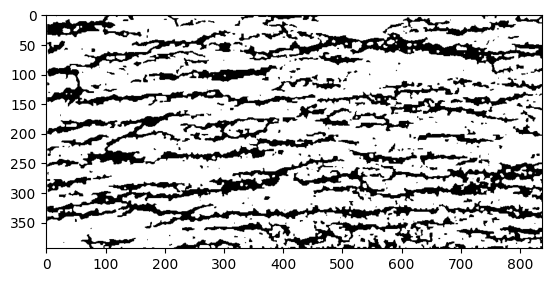

In [15]:
# Doesn't work well when the ratio of foreground to background is low it seems
cv = skimage.segmentation.chan_vese(cropped_image,mu=0.1)
plt.imshow(cv,cmap='gray')

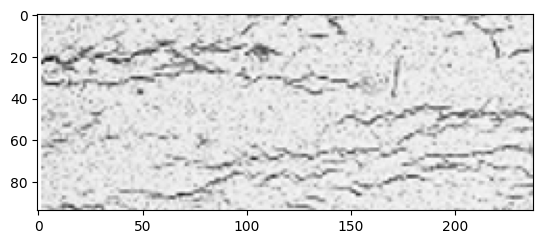

In [18]:
image_cropped2 = cropping_functions.cropImage(image,crop_bottom=450,crop_top=200,crop_left=0,crop_right=750)
plt.imshow(image_cropped2,cmap='gray')

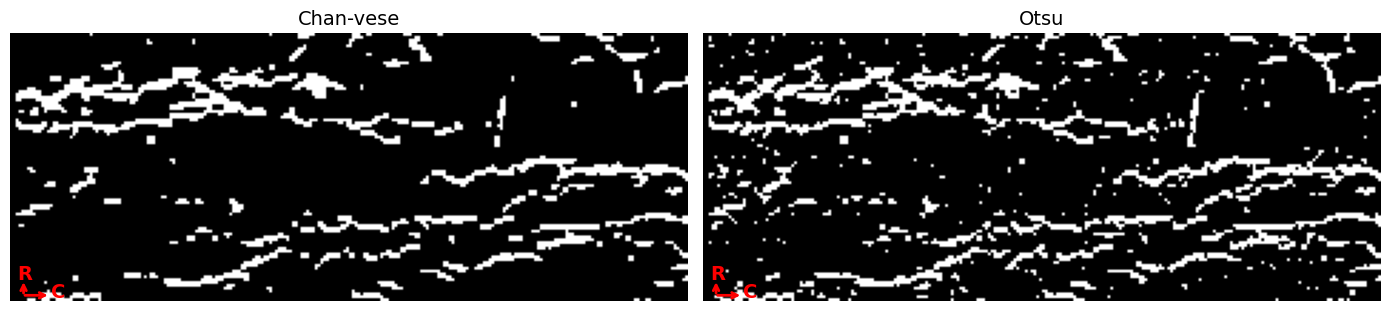

In [27]:
cv = skimage.segmentation.chan_vese(image_cropped2,mu=0.03,max_num_iter=500)
otsu_filter = skimage.filters.threshold_otsu(image_cropped2)
otsu_im2 = image_cropped2 < otsu_filter
plt_f.plot_comparison(cv,'Chan-vese',otsu_im2,'Otsu')